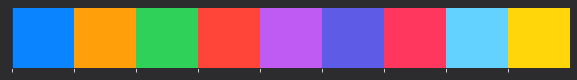

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from lightautoml.tasks import Task
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [2]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 3 * 3600 # Time in seconds for automl run
TARGET_NAME = 'target'

In [3]:
train=pd.read_csv('data/train.csv',index_col=[0])
test=pd.read_csv('data/test.csv',index_col=[0])
train[TARGET_NAME]=train[TARGET_NAME].str.slice(start=6).astype(int)-1
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
task=Task('multiclass',)

In [5]:
roles={
    'target':TARGET_NAME,
    'drop':['id']
}

In [6]:
automl_model=TabularUtilizedAutoML(task=task,timeout=TIMEOUT,cpu_limit=N_THREADS,reader_params={'n_jobs':N_THREADS})
train_pred=automl_model.fit_predict(train,roles=roles)

1100)	total: 29.7s	remaining: 51.3s
1200:	learn: 1.0535310	test: 1.0938824	best: 1.0938135 (1157)	total: 32.5s	remaining: 48.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.093813482
bestIteration = 1157

Shrink model to first 1158 iterations.
Lvl_0_Pipe_1_Mod_3_CatBoost fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	learn: 1.3686144	test: 1.3686150	best: 1.3686150 (0)	total: 22.6ms	remaining: 1m 7s
100:	learn: 1.1117399	test: 1.1127462	best: 1.1127462 (100)	total: 2.23s	remaining: 1m 3s
200:	learn: 1.1041982	test: 1.1067880	best: 1.1067880 (200)	total: 4.78s	remaining: 1m 6s
300:	learn: 1.0998827	test: 1.1035532	best: 1.1035532 (300)	total: 7.08s	remaining: 1m 3s
400:	learn: 1.0963589	test: 1.1013481	best: 1.1013481 (400)	total: 9.59s	remaining: 1m 2s
500:	learn: 1.0933893	test: 1.0995052	best: 1.0995052 (500)	total: 11.9s	remaining: 59.3s
600:	learn: 1.09

<AxesSubplot:xlabel='Feature'>

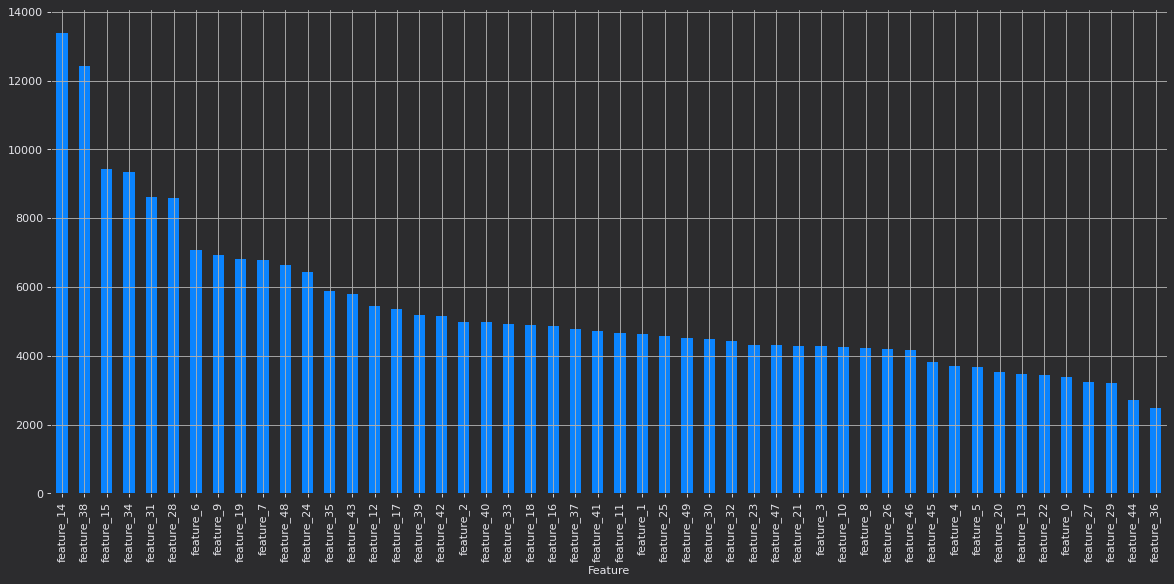

In [8]:
fs=automl_model.get_feature_scores('fast',silent=False)
fs.set_index('Feature')['Importance'].plot.bar(figsize=(18,8),grid=True)

Training the light automl model and using it to get the feature importance scores.

In [9]:
pred=automl_model.predict(test)
print(pred[:5])

array([[0.09245157, 0.62328047, 0.1674244 , 0.11684368],
       [0.09470245, 0.689008  , 0.13114555, 0.08514402],
       [0.08288655, 0.6472877 , 0.1698524 , 0.0999734 ],
       [0.08922836, 0.54137766, 0.27344412, 0.09594988],
       [0.07826462, 0.6325451 , 0.18106997, 0.10812034]], dtype=float32)


In [11]:
print(log_loss(train[TARGET_NAME].values,train_pred.data))

1.0838092758867144


In [12]:
submission2=pd.read_csv('data/sample_submission.csv')
submission2.iloc[:,1:]=pred.data
submission2.to_csv('submissions/submission2.csv',index=False)